In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad

In [2]:
group = "complete_network"

In [3]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", group, "supercomputer", "networks")

In [4]:
e = Experiments()
e.add_experiment(name="p0125_p1",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5")
e.add_experiment(name="p0125_p1_p2",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5")
e.add_experiment(name="p025_p1",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5")
e.add_experiment(name="p025_p1_p2",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.hdf5")
e.add_experiment(name="p05_p1",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")
e.add_experiment(name="p05_p1_p2",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5")

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/

In [6]:
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
specific_trace_ids = {k: v[::int(len(v)/160)] for k, v in specific_trace_ids.items()}
specific_trace_ids

{'p0125_p1': array([   12,   241,   497,   782,   951,  1252,  1464,  1780,  1976,
         2217,  2346,  2521,  2901,  3156,  3549,  3762,  3902,  4103,
         4431,  4793,  4942,  5184,  5494,  5684,  6003,  6220,  6514,
         6778,  6935,  7177,  7309,  7481,  7685,  7878,  8248,  8473,
         8788,  9011,  9411,  9730,  9907, 10243, 10476, 10712, 10850,
        11047, 11352, 11572, 11791, 11931, 12099, 12344, 12577, 12758,
        13085, 13257, 13482, 13697, 13969, 14255, 14586, 14690, 15125,
        15438, 15666, 15841, 16097, 16232, 16485, 16776, 17131, 17398,
        17715, 17977, 18415, 18605, 18824, 19090, 19401, 19694, 19944,
        20193, 20567, 20807, 20949, 21277, 21471, 21701, 21938, 22231,
        22442, 22818, 23083, 23270, 23477, 23774, 24205, 24443, 24655,
        24980, 25223, 25416, 25670, 25840, 26012, 26244, 26498, 26724,
        26926, 27119, 27373, 27666, 27840, 28097, 28415, 28693, 28910,
        29047, 29237, 29382, 29703, 29850, 30146, 30372, 30667, 3

In [7]:
max_post = specific_trace_ids["p0125_p1"].size - 1
max_post

161

In [8]:
%%time
depolarisation_blocked = depolarisation_block(data_obj=sl, specific_trace_ids=specific_trace_ids)
connectivity,_,_ = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=max_post, 
                                     test_populations=specific_trace_ids)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, 
                                                  trace_ids=specific_trace_ids, parameters={"start": 0.5, "end": 2.5})

CPU times: user 5min 55s, sys: 1min 6s, total: 7min 1s
Wall time: 8min 17s


In [9]:
%%time
frequency_analysis_dict = {f"{i}" : dict() for i in ["p0125","p025","p05"]}
import matplotlib.pyplot as plt
for k in frequency_analysis_dict:
    control = f"{k}_p1"
    p1p2 =  f"{k}_p1_p2"
    d = sl.get_data(name=control)
    d1 = sl.get_data(name=p1p2)
    ids = specific_trace_ids[control]
    for i in ids:
        if frequency_analysis_dict_dspn[control][i] > 0 and frequency_analysis_dict_dspn[p1p2][i] > 0:
            diff = frequency_analysis_dict_dspn[p1p2][i] - frequency_analysis_dict_dspn[control][i]
            frequency_analysis_dict[k].update({i: diff})
            if False:
                plt.figure()
                plt.title(f"{diff} Hz")
                v = d.get_voltage(neuron_id=i)
                plt.plot(v,c="black")
                v1 = d1.get_voltage(neuron_id=i)
                plt.plot(v1,c="red")
                plt.show()
        

CPU times: user 4.13 ms, sys: 0 ns, total: 4.13 ms
Wall time: 4.3 ms


In [10]:
do_feature=False

In [11]:
os = dict()
us = dict()
for ks in ["p0125","p025", "p05"]:
    o = dict()
    u = dict()
    for i in frequency_analysis_dict[ks]:

        if i in connectivity[f"{ks}_p1"] and not(depolarisation_blocked[f"{ks}_p1_p2"][i]):

            sums=0
            diffs = frequency_analysis_dict[ks][i]
            for r, k in connectivity[f"{ks}_p1"][i].items():
                sums+=k

            if sums > 500 and diffs < -10 and do_feature:
                u.update({i: dict(num_synapses=sums,diff_Hz=diffs)})

            o.update({i: dict(num_synapses=sums,diff_Hz=diffs)})
    os.update({ks: o})
    us.update({ks: u})

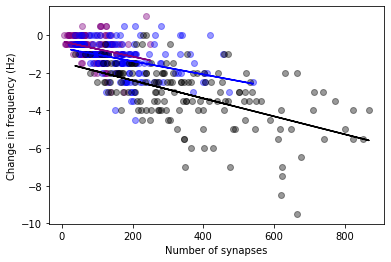

In [12]:
import numpy as np

cs = {"p05":"black","p025": "blue","p0125":"purple"}
for k in ["p0125","p025","p05"]:
    x = list()
    y = list()
    for i in os[k]:
        plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
        x.append(os[k][i]["num_synapses"])
        y.append(os[k][i]["diff_Hz"])
        if i in u:
            plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.xlabel("Number of synapses")
plt.ylabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [13]:
%%time
e_tmps = dict()
for e in ["p0125","p025","p05"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        
        tmps.append(len(presynaptic[0]))
    e_tmps.update({e: tmps})      
    
        


CPU times: user 1min 16s, sys: 4.32 s, total: 1min 21s
Wall time: 1min 21s


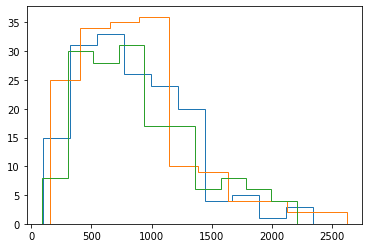

In [14]:
for e in e_tmps:
    plt.hist(e_tmps[e],histtype="step")

In [15]:
%%time
e_tmps = dict()
for e in ["p0125","p025","p05"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        if len(presynaptic[0]) > 1500:
            tmps.append(s)
    e_tmps.update({e: tmps})      
    
        


CPU times: user 1min 18s, sys: 4.8 s, total: 1min 23s
Wall time: 1min 23s


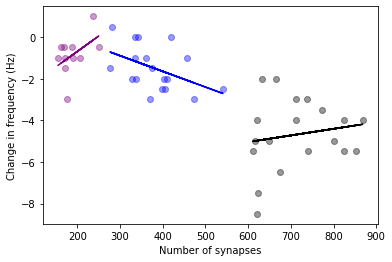

In [16]:
import numpy as np

cs = {"p05":"black","p025": "blue","p0125":"purple"}
for k in ["p0125","p025","p05"]:
    x = list()
    y = list()
    for i in os[k]:
        
        if i in e_tmps[f"{k}"]:
            plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
            x.append(os[k][i]["num_synapses"])
            y.append(os[k][i]["diff_Hz"])
            if i in u:
                plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.xlabel("Number of synapses")
plt.ylabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [17]:
import h5py
import os
with h5py.File(os.path.join("synapses_frequency",f"{group}_synapse_frequency.h5"), 'w') as hf:
    
    hf_add = hf.create_group("depolarisation_blocked")
    for f,data in depolarisation_blocked.items():
        grp = hf_add.create_group(f)
        for i, true_or_false in data.items():
            grp.create_dataset(f"{i}", data=np.array([true_or_false]))
            
    hf_add = hf.create_group("connectivity")
    for f,data in connectivity.items():
        grp = hf_add.create_group(str(f))
        for dest, pre in data.items():
            grps = grp.create_group(str(dest))
            for i, num in pre.items():
                grps.create_dataset(f"{i}", data=np.array([num]))
            
    hf_add = hf.create_group("frequency_analysis_dict_dspn")
    for f,data in frequency_analysis_dict_dspn.items():
        grp = hf_add.create_group(str(f))
        for i, freq in data.items():
            grp.create_dataset(f"{i}", data=np.array([freq]))
            
    
    hf.close()


In [18]:
with h5py.File(os.path.join("synapses_frequency",f"{group}_synapses.h5"), 'w') as f:
        
    for e in ["p0125","p025", "p05"]:
        synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
        f.create_dataset(f"{e}", data=synapses)
        